In [ ]:
import pandas as pd
import numpy as np
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Convolution2D, MaxPooling2D, Flatten, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.applications.resnet50 import ResNet50

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install keras.callbacks

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement keras.callbacks (from versions: none)
ERROR: No matching distribution found for keras.callbacks


In [ ]:
train_dir = "/content/drive/MyDrive/Leukemia - Copy/train/"
valid_dir = "/content/drive/MyDrive/Leukemia - Copy/test/"
test_dir = "/content/drive/MyDrive/Leukemia - Copy/prediction/"

img_width, img_height = 224, 224

In [ ]:
conv_base = ResNet50(weights='imagenet', 
                  include_top=False,
                  input_shape=(img_width, img_height, 3))

# Show architecture
conv_base.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                           

In [ ]:
import os, shutil
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

def extract_features(directory, sample_count):
    features = np.zeros(shape=(sample_count, 7, 7, 2048))  # Must be equal to the output of the convolutional base
    labels = np.zeros(shape=(sample_count,4))
    # Preprocess data
    generator = datagen.flow_from_directory(directory,
                                            target_size=(img_width,img_height),
                                            batch_size = batch_size,
                                            class_mode='categorical')
    i = 0
    for inputs_batch, labels_batch in generator:
        features_batch = conv_base.predict(inputs_batch)
        features[i * batch_size: (i + 1) * batch_size] = features_batch
        labels[i * batch_size: (i + 1) * batch_size] = labels_batch
        i += 1
        if i * batch_size >= sample_count:
            break
    return features, labels
    
train_features, train_labels = extract_features(train_dir, 60)  # Agree with our small dataset size
validation_features, validation_labels = extract_features(valid_dir, 35)
# test_features, test_labels = extract_features(test_dir, 17)

FileNotFoundError: ignored

In [ ]:
train_labels

array([[1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 0., 1.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.],
       [0., 0., 0., 1.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [1., 0., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [1., 0., 0., 0.],


In [ ]:
epochs = 300

model = Sequential()
model.add(GlobalAveragePooling2D(input_shape=(7,7,2048)))
model.add(Dense(4, activation='softmax'))
model.summary()

NameError: ignored

In [ ]:
from keras.callbacks import ModelCheckpoint
checkpoint = ModelCheckpoint('model-{epoch:03d}-{acc:03f}-{val_acc:03f}.h5', verbose=1, monitor='val_loss',save_best_only=True, mode='auto')  

# Compile model
from tensorflow.keras.optimizers import Adam
model.compile(optimizer=Adam(),
              loss='categorical_crossentropy',
              metrics=['acc'])

# Train model
history = model.fit(train_features, train_labels,
                    epochs=epochs,
                    batch_size=batch_size, 
                    callbacks=[checkpoint],
                    validation_data=(validation_features, validation_labels))

Epoch 1/50
1/2 [==============>...............] - ETA: 0s - loss: 1.3382 - acc: 0.3125
Epoch 1: val_loss improved from inf to 1.37583, saving model to model-001-0.250000-0.371429.h5
2/2 [==============================] - 1s 196ms/step - loss: 1.4309 - acc: 0.2500 - val_loss: 1.3758 - val_acc: 0.3714
Epoch 2/50
1/2 [==============>...............] - ETA: 0s - loss: 1.3839 - acc: 0.4062
Epoch 2: val_loss improved from 1.37583 to 1.35118, saving model to model-002-0.300000-0.285714.h5
2/2 [==============================] - 0s 49ms/step - loss: 1.3795 - acc: 0.3000 - val_loss: 1.3512 - val_acc: 0.2857
Epoch 3/50
1/2 [==============>...............] - ETA: 0s - loss: 1.3498 - acc: 0.3750
Epoch 3: val_loss did not improve from 1.35118
2/2 [==============================] - 0s 35ms/step - loss: 1.3627 - acc: 0.4333 - val_loss: 1.3521 - val_acc: 0.3429
Epoch 4/50
1/2 [==============>...............] - ETA: 0s - loss: 1.3743 - acc: 0.3125
Epoch 4: val_loss improved from 1.35118 to 1.34502, savi

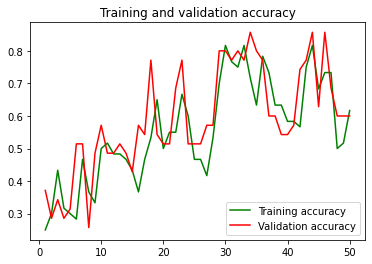

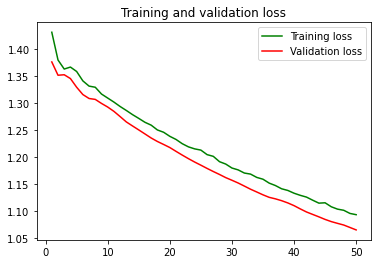

In [ ]:
import matplotlib.pyplot as plt

acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

In [ ]:
from keras.preprocessing import image
def prediction(img_path):
    org_img = image.load_img(img_path)
    img = image.load_img(img_path, target_size=(img_width, img_height))
    img_tensor = image.img_to_array(img)  # Image data encoded as integers in the 0–255 range
    img_tensor /= 255.  # Normalize to [0,1] for plt.imshow application
    plt.imshow(org_img)                           
    plt.axis('off')
    plt.show()


    # Extract features
    features = conv_base.predict(img_tensor.reshape(1,img_width, img_height, 3))

    # Make prediction
    try:
        prediction = model.predict(features)
    except:
        prediction = model.predict(features.reshape(1, 7*7*2048))
        
    classes = ["ALL", "AML", "CLL", "CML"]
    print(str(classes[np.argmax(np.array(prediction[0]))]))

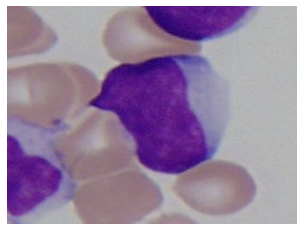

ALL


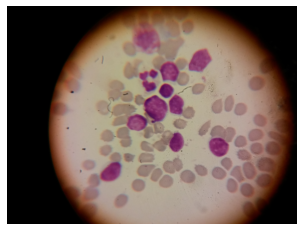

CLL


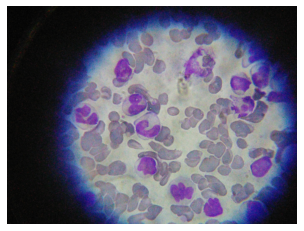

CLL


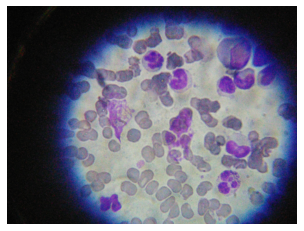

CLL


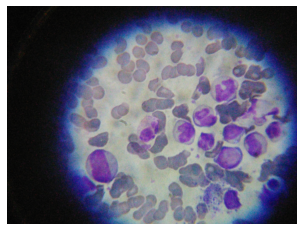

CLL


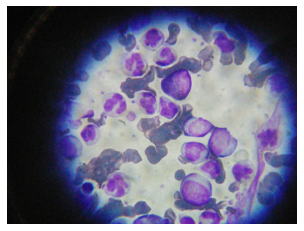

CML


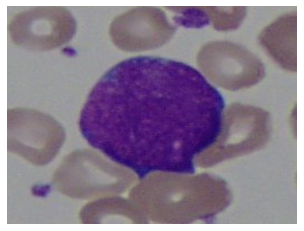

ALL


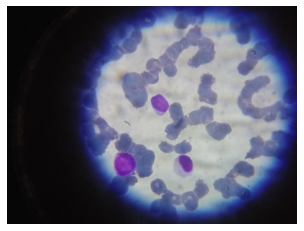

CLL


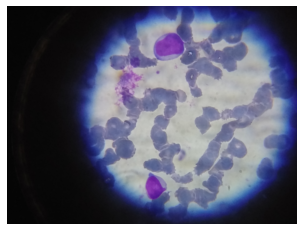

CLL


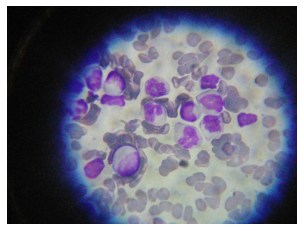

CLL


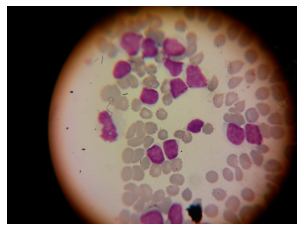

CLL


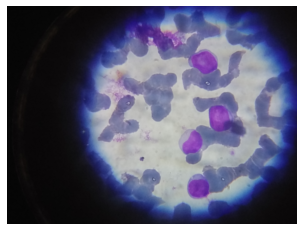

CLL


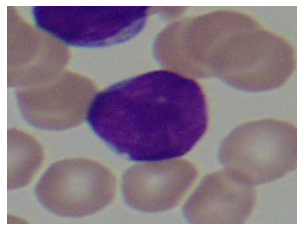

ALL


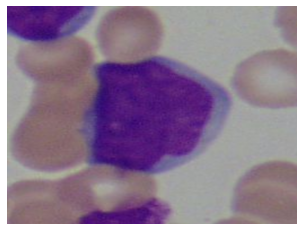

ALL


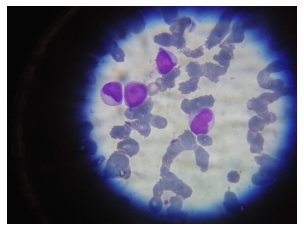

CML


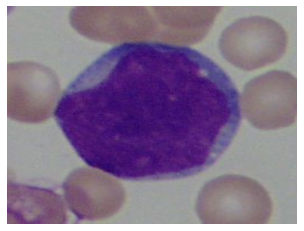

ALL


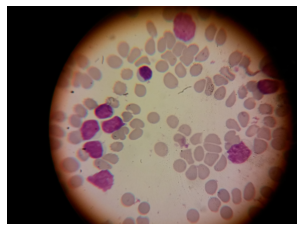

CLL


In [ ]:
pred_dir = "/content/drive/MyDrive/Leukemia - Copy/prediction/"
import random
pred_files = random.sample(os.listdir(pred_dir),17)
for f in pred_files:
    prediction(pred_dir+f)

In [ ]:
training_accuracy_resnet= history.history['acc'][-1]
print("Training Accuracy ResNet   :", training_accuracy_resnet )
training_loss_resnet= history.history['loss'][-1]
print("Training Loss ResNet:    ", training_loss_resnet)

validation_accuracy_resnet= history.history['val_acc'][-1]
print("Validation Accuracy ResNet :", validation_accuracy_resnet)
validation_loss_resnet= history.history['val_loss'][-1]
print("Validation Loss ResNet     :", validation_loss_resnet)

Training Accuracy ResNet   : 0.6166666746139526
Training Loss ResNet:     1.0926975011825562
Validation Accuracy ResNet : 0.6000000238418579
Validation Loss ResNet     : 1.0644742250442505
